First we will import the data.

In [1]:

import pandas as pd
import numpy as np

train_file = 'data/train.csv'
test_file = 'data/test.csv'

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

Now we will do some basic analyses on the data to get a better understanding of it.

In [2]:
salesMean = train['SalePrice'].mean()
salesMedian = train['SalePrice'].median()
#salesMode = train['SalePrice'].mode()
salesMin = train['SalePrice'].min()
salesMax = train['SalePrice'].max()

print("Basic Sale Price Statistics:")
print("Mean:\t$" + str(round(salesMean)))
print("Median:\t$" + str(round(salesMedian)))
#print("Mode:\t$" + str(round(salesMode)))
print("Range:\t$" + str(salesMin) + "-$" + str(salesMax))

Basic Sale Price Statistics:
Mean:	$180921
Median:	$163000
Range:	$34900-$755000


#### Viewing NA values
We send the output to a csv because there are too many features to see properly in Jupyter.

In [3]:
train.isnull().sum().to_csv("nullvals.csv")

Some values of NA are irregular, now try and visualize them here.

In [4]:
# this makes the following row actually viewable
pd.set_option('display.max_columns', 100)

In [5]:
# this is an off example BsmtExposure being NA but BsmtQual being not NA, meaning, meaning there is a discrepency
# we will omit this row if basement data is considered
train[~ train['BsmtQual'].isnull() & train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [6]:
# this is another example of a single incorrect value
# this value would be changed to the most frequently occuring class if it were necessary
train[train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


We will now create some visualizations to better understand the dataset

In [7]:
# this makes graph generation work
%matplotlib inline

# importing the necessary libraries for visualizations
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# general visualization configurations
sns.set(color_codes=True)
#sns.set(rc={'figure.figsize':(11,5)})

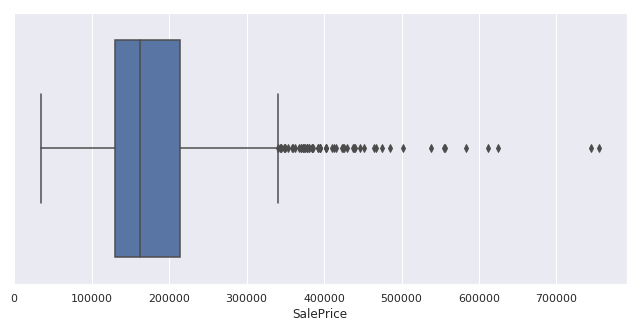

In [9]:
# Box and whisker plot of SalePrice
plt.figure(figsize=(11,5))

box_plot_saleprice = sns.boxplot(x=train['SalePrice'])